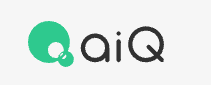

[disclaimer](./disclaimer.txt/)

# How to look up factor list for FACTSET Data
This sample show how to achieve the following operation with a simple interface:
- Look up the unique FACTSET instrument ID (FSYM_ID) from factors
- Look up the unique FACTSET instrument ID from a factor group

## `DAL`  Data Accessor Library 
> DAL access data from FACTSET database / API for Equity Data  ## Import ASR Data Accessor Library (DAL)

In [4]:
from aiq_strategy_robot.data.data_accessor import DAL
data_source='FACTSET'
handler = DAL()

### Pattern 1: look up FACTSET from factors groups

####  **load**
> Load the data to memory  
> Set data_type = 'quants_factor_list' for looking up instrument IDs.

In [5]:
handler = handler.load(
    data_source, # type: ignore
    data_type='quants_factor_list',
    # factors="retMom63D",
    factor_groups="Momentum",
    # keyword="momentum",
)

#### **Retrieve**
> `Pandas.DataFrame` the loaded data via `retrieve`

In [6]:
df_symbol = handler.retrieve(transformed=False)
df_symbol.head(20)

,factor,name,factorGroup,sdfName,formula,tags,format
0,velocity63D,63D Velocity,Momentum,VELOCITY_63D,"QFL_VELOCITY(0,63D)","momentum,prices",double
1,stochastic63D,63D Stochastic Oscillator,Momentum,STOCHASTIC_63D,"QFL_STOCHASTIC(0,63D)","momentum,prices",double
2,retMom63D,63D Return Momentum,Momentum,RET_MOM_63D,"QFL_RET_MOM(0,63D)","momentum,prices",double
3,resRetMom63D,63D Residual Momentum,Momentum,RES_RET_MOM_63D,"QFL_RES_RET_MOM(0,63D)","momentum,prices",double
4,rsi63D,63D Relative Strength Index,Momentum,RSI_63D,"QFL_RSI(0,63D)","momentum,prices",double
5,accel63D,63D Acceleration,Momentum,ACCEL_63D,"QFL_ACCEL(0,63D)","momentum,prices",double
6,velocity60M,60M Velocity,Momentum,VELOCITY_60M,"QFL_VELOCITY(0,60M)","momentum,prices",double
7,stochastic60M,60M Stochastic Oscillator,Momentum,STOCHASTIC_60M,"QFL_STOCHASTIC(0,60M)","momentum,prices",double
8,retMom60M,60M Return Momentum,Momentum,RET_MOM_60M,"QFL_RET_MOM(0,60M)","momentum,prices",double
9,resRetMom60M,60M Residual Momentum,Momentum,RES_RET_MOM_60M,"QFL_RES_RET_MOM(0,60M)","momentum,prices",double


#### many results were retrieved.
> The search result can be made shorter by keyword.

In [7]:
# This time keyword is specified.
# it can be also used to focus.
# `data_type` must be 'quants_factor_list'
handler = handler.load(
    data_source, # type: ignore
    data_type='quants_factor_list',
    factors="retMom63D",
    # factor_groups="Momentum",
    keyword="momentum",
)
df_symbol = handler.retrieve(transformed=False)
df_symbol.head(20)

,factor,name,factorGroup,sdfName,formula,tags,format
0,retMom63D,63D Return Momentum,Momentum,RET_MOM_63D,"QFL_RET_MOM(0,63D)","momentum,prices",double


### Pattern 2: Look up FSYM_ID from factors


In [8]:
handler = handler.load(
    data_source, # type: ignore
    data_type='quants_factor_list',
    factors="retMom63D",
    # factor_groups="Momentum",
    keyword="momentum",
)
df_symbol = handler.retrieve(transformed=False)
df_symbol.head(20)

,factor,name,factorGroup,sdfName,formula,tags,format
0,retMom63D,63D Return Momentum,Momentum,RET_MOM_63D,"QFL_RET_MOM(0,63D)","momentum,prices",double


#### Caution: You can only input either factors or factset_groups, not both, when searching.

In [9]:
# An error is thrown if you input both factors and factor_groups as follows.
handler = handler.load(
    data_source, # type: ignore
    data_type='quants_factor_list',
    factors="retMom63D",
    factor_groups="Momentum",
    keyword="momentum",
)

AssertionError: `factor` and `factor_group` cannot be set together. Use either one.